In [1]:
#importing libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [2]:
df_listings = pd.read_csv('C:/Users/kimhy/Documents/listings.csv')
df_venues = pd.read_csv('C:/Users/kimhy/Documents/venues.csv.gz', compression='gzip')

In [3]:
df_venues_austin = df_venues[df_venues['city'] == 'austin']
df_venues_austin['rating'].isna().sum()

7184

In [4]:
df_venues_austin.shape

(18708, 7)

In [5]:
df_venues_austin['rating'].describe()

count    11524.000000
mean         4.079183
std          0.842391
min          1.000000
25%          3.700000
50%          4.200000
75%          4.700000
max          5.000000
Name: rating, dtype: float64

#### There seems to be a substantial amount of missing values in the rating column for austin. Instead of replacing these values with mean values for the overall rating, I believe repalcing these values with 0 would present a more accurate picture. 

#### Usually a place with no rating generally means there are not enough people visiting that place to give it any sort of rating

#### Additionally, the lowest rating possible is 1 as shown by the above block of code. Thus if we give NaN values a 0 rating, it help to distinguish them from the rest who have ratings.

In [7]:
df_venues_austin.fillna(0, inplace=True)

C:\Users\kimhy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [8]:
df_listings_austin = df_listings[df_listings['metropolitan'] == 'austin']
df_listings_austin.head(1)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
864,5.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",0,2.0,Real Bed,3.0,4.0,strict,austin,NaN,...,10.0,9.0,10.0,10.0,100.0,10.0,Entire home/apt,TX,"$1,200.00",78756.0


#### Now for plotting

C:\Users\kimhy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


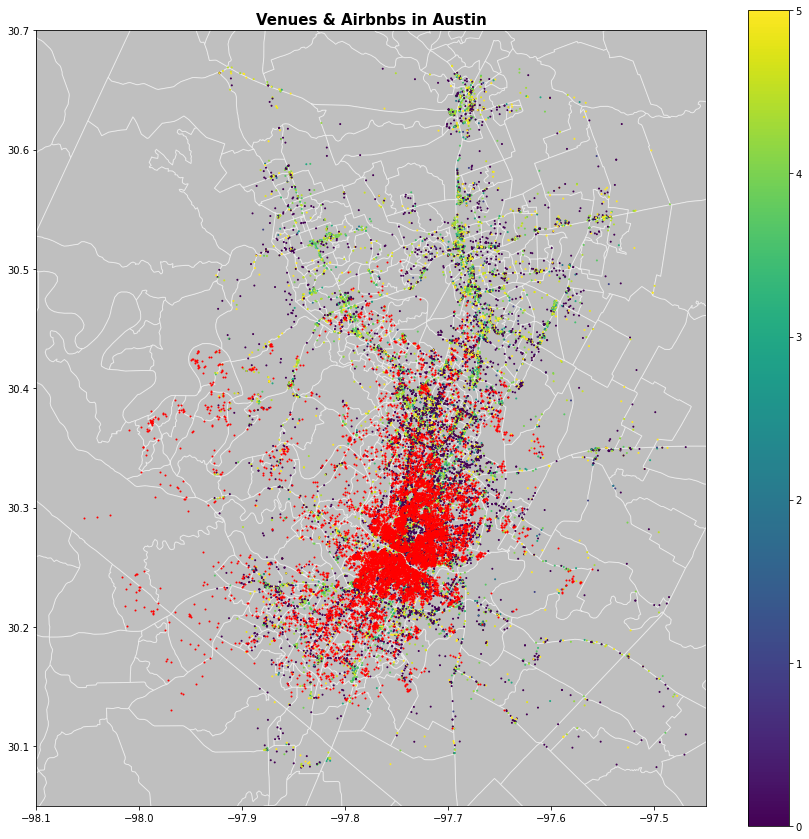

In [9]:
# import street map
street_map = gpd.read_file(r'C:\Users\kimhy\Documents\cb_2018_48_bg_500k.shp')
# designate coordinate system
crs = {'init':'epsg:4326'}
# zip x and y coordinates into single feature
geometry_venues = [Point(xy) for xy in zip(df_venues_austin['longitude'], df_venues_austin['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df_venues_austin, crs = crs, geometry = geometry_venues)

geometry_listings = [Point(xy) for xy in zip(df_listings_austin['longitude'], df_listings_austin['latitude'])]
listing_geo_df = gpd.GeoDataFrame(df_listings_austin, crs=crs, geometry = geometry_listings)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.5,color='grey',edgecolor='white')

# adding geodataframe to axes
# assign 'rating' variable to represent coordinates on graph for venues 
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize

#plotting the venues
geo_df.plot(column='rating',ax=ax,alpha=1, legend=True,markersize=1)
#plotting the listings of Airbnb 
listing_geo_df.plot( c = 'red', ax=ax, alpha=1, legend=True, markersize=1)


# add title to graph
plt.title('Venues & Airbnbs in Austin', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display (LA)
plt.xlim(-98.1,-97.45)
plt.ylim( 30.05,30.7)

# show map
plt.show()

In [11]:
df_listings_2020_aug = pd.read_csv('C:/Users/kimhy/Documents/2020_august_austin_listing.csv')

In [12]:
df_listings_2020_aug.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,179,7,24,2019-03-16,0.17,3,167
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,125,2,535,2020-07-12,3.83,1,365
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,20,2012-05-24,0.14,2,83
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,257,2019-11-03,2.03,1,89
5,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24829,-97.73726,Entire home/apt,99,30,112,2020-03-08,0.86,1,31
6,6448,Secluded Studio at Barton Springs,14156,Amy,NaN,78704,30.26027,-97.76503,Entire home/apt,139,3,232,2020-07-12,2.12,2,140
7,14913,Blue Boy Club House / Music Venue,58635,Steven,NaN,78748,30.15645,-97.82411,Entire home/apt,300,1,28,2019-11-03,0.36,1,242
8,21126,Quiet and Chic Mid-Century Retreat with Yard.,80406,Dani,NaN,78704,30.24417,-97.73988,Entire home/apt,165,1,99,2020-07-30,1.07,11,134
9,21145,"Private Pool, Non Smoking, Pet Friendly, Central",80511,April,NaN,78705,30.29422,-97.74618,Entire home/apt,220,30,37,2020-06-13,0.67,1,292
